In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os 
# os.chdir("D:/Downloads/ZS")
os.listdir()

['.gitattributes',
 '.ipynb_checkpoints',
 'catboost_info',
 'README.md',
 'test.csv',
 'train.csv',
 'ZS Associates Challenge Data Science Intern.ipynb']

### Reading the Datasets

In [2]:
train=pd.read_csv('train.csv')
train.head()

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country,total_email_characters,...,social_account_number,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,snapchat_plan,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
0,0,84,141,0,37,14.69,415,111,WV,11.2,...,330-8173,97,43.96,18.87,yes,3.02,222.0,5,258.6,0
1,1,99,108,2,30,NaN,510,113,LA,9.8,...,380-7624,95,47.02,18.71,yes,2.65,220.1,6,276.6,0
2,2,111,96,1,0,9.22,415,105,MA,9.1,...,359-9369,91,29.56,24.43,no,2.46,287.4,7,173.9,0
3,3,100,105,0,0,11.04,415,108,NV,7.7,...,376-4540,140,38.83,12.33,no,2.08,145.1,7,228.4,0
4,4,92,59,1,0,5.15,510,88,CO,12.5,...,331-3842,89,26.11,17.47,no,3.38,205.5,10,153.6,0


In [3]:
train.shape

(2233, 22)

#### Check Class Distribution

In [4]:
train['turn_anti_social'].value_counts()

0    1910
1     323
Name: turn_anti_social, dtype: int64

#### Check for null values

In [5]:
train.isnull().sum()

uid                                   0
total_facebook_statuses               0
account_membership_period             0
service_support_calls                 0
number_of_snaps                       0
total_whatsapp_charge               212
sub_country_code                      0
total_twitter_tweets                  0
country                               0
total_email_characters              217
email_plan                            0
total_whatsapp_msg_characters         0
social_account_number                 0
total_whatsapp_msgs                   0
total_facebook_charge                 0
total_twitter_charge                  0
snapchat_plan                         0
total_email_charge                    0
total_twitter_tweet_characters      214
total_emails                          0
total_facebook_status_characters    215
turn_anti_social                      0
dtype: int64

In [6]:
test=pd.read_csv('test.csv')
test['turn_anti_social']=0 #declaring randomly
test.head()

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country,total_email_characters,...,social_account_number,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,snapchat_plan,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
0,0,130,100,2,0,2.86,415,69,CT,7.3,...,389-2114,122,40.09,14.96,no,1.97,176.0,1,235.8,0
1,1,91,73,1,0,12.48,415,97,VT,10.3,...,414-1496,89,37.03,18.75,no,2.78,220.6,6,217.8,0
2,2,123,137,2,0,11.73,415,115,NY,11.4,...,389-2540,98,29.58,13.71,no,3.08,161.3,3,174.0,0
3,3,110,89,1,0,10.23,408,115,DE,12.8,...,421-9144,106,33.51,14.10,no,3.46,165.9,3,197.1,0
4,4,81,27,5,0,7.44,510,101,OR,15.0,...,355-2840,87,39.46,17.92,no,4.05,210.8,6,232.1,0


In [7]:
test.isnull().sum()

uid                                 0
total_facebook_statuses             0
account_membership_period           0
service_support_calls               0
number_of_snaps                     0
total_whatsapp_charge               0
sub_country_code                    0
total_twitter_tweets                0
country                             0
total_email_characters              0
email_plan                          0
total_whatsapp_msg_characters       0
social_account_number               0
total_whatsapp_msgs                 0
total_facebook_charge               0
total_twitter_charge                0
snapchat_plan                       0
total_email_charge                  0
total_twitter_tweet_characters      0
total_emails                        0
total_facebook_status_characters    0
turn_anti_social                    0
dtype: int64

In [8]:
test.shape

(1100, 22)

### EDA

<AxesSubplot:>

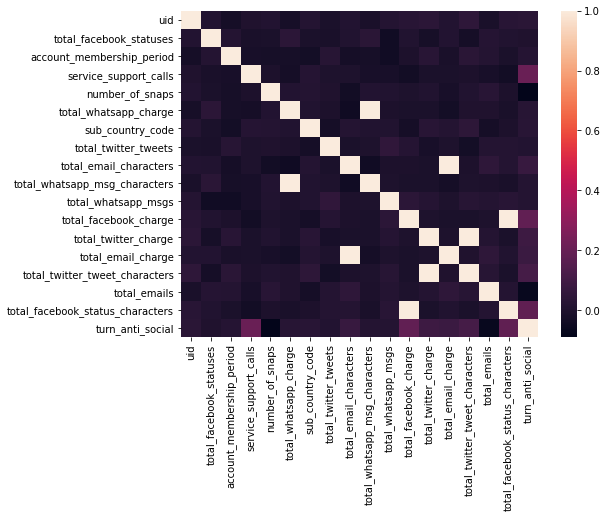

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
sns.heatmap(train.corr())

In [10]:
train[['total_whatsapp_msg_characters', 'total_email_characters', 'total_facebook_charge', 'total_email_charge',\
      'total_facebook_status_characters', 'total_twitter_tweet_characters', 'total_email_characters']].corr()

,total_whatsapp_msg_characters,total_email_characters,total_facebook_charge,total_email_charge,total_facebook_status_characters,total_twitter_tweet_characters,total_email_characters
total_whatsapp_msg_characters,1.000000,-0.039437,-0.010523,-0.028604,-0.013563,-0.000334,-0.039437
total_email_characters,-0.039437,1.000000,-0.003922,0.999993,0.017638,-0.005312,1.000000
total_facebook_charge,-0.010523,-0.003922,1.000000,-0.009443,1.000000,-0.008295,-0.003922
total_email_charge,-0.028604,0.999993,-0.009443,1.000000,0.008184,0.002885,0.999993
total_facebook_status_characters,-0.013563,0.017638,1.000000,0.008184,1.000000,-0.008551,0.017638
total_twitter_tweet_characters,-0.000334,-0.005312,-0.008295,0.002885,-0.008551,1.000000,-0.005312
total_email_characters,-0.039437,1.000000,-0.003922,0.999993,0.017638,-0.005312,1.000000


In [11]:
train_bp = train.copy()
test_bp = test.copy()

In [12]:
df_all=train.append(test)

In [13]:
df_all_old=df_all.copy()

In [14]:
df_all.shape

(3333, 22)

In [15]:
df_all.dtypes

uid                                   int64
total_facebook_statuses               int64
account_membership_period             int64
service_support_calls                 int64
number_of_snaps                       int64
total_whatsapp_charge               float64
sub_country_code                      int64
total_twitter_tweets                  int64
country                              object
total_email_characters              float64
email_plan                           object
total_whatsapp_msg_characters       float64
social_account_number                object
total_whatsapp_msgs                   int64
total_facebook_charge               float64
total_twitter_charge                float64
snapchat_plan                        object
total_email_charge                  float64
total_twitter_tweet_characters      float64
total_emails                          int64
total_facebook_status_characters    float64
turn_anti_social                      int64
dtype: object

In [16]:
df_all.describe()

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,total_email_characters,total_whatsapp_msg_characters,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3121.000000,3333.000000,3333.000000,3116.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3119.000000,3333.000000,3118.000000,3333.000000
mean,929.036304,100.435644,101.064806,1.562856,8.099010,9.045540,437.182418,100.114311,10.248909,200.872037,100.107711,30.562307,17.083540,2.764581,201.510965,4.479448,179.611931,0.096910
std,618.659850,20.069084,39.822106,1.315491,13.688365,2.279357,42.371290,19.922625,2.794114,50.573847,19.568609,9.259435,4.310668,0.753773,50.596502,2.461214,54.211561,0.295879
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.040000,408.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,416.000000,87.000000,74.000000,1.000000,0.000000,7.520000,408.000000,87.000000,8.500000,167.000000,87.000000,24.430000,14.160000,2.300000,167.100000,3.000000,143.625000,0.000000
50%,833.000000,101.000000,101.000000,1.000000,0.000000,9.060000,415.000000,100.000000,10.300000,201.200000,100.000000,30.500000,17.120000,2.780000,202.400000,4.000000,179.300000,0.000000
75%,1399.000000,114.000000,127.000000,2.000000,20.000000,10.610000,510.000000,114.000000,12.100000,235.300000,113.000000,36.790000,20.000000,3.270000,235.500000,6.000000,216.000000,0.000000
max,2232.000000,165.000000,243.000000,9.000000,51.000000,17.770000,510.000000,170.000000,20.000000,395.000000,175.000000,59.640000,30.910000,5.400000,363.700000,20.000000,350.800000,1.000000


In [17]:
df_all.head(1)

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country,total_email_characters,...,social_account_number,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,snapchat_plan,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
0,0,84,141,0,37,14.69,415,111,WV,11.2,...,330-8173,97,43.96,18.87,yes,3.02,222.0,5,258.6,0


In [18]:
for i in df_all.columns:
    print(i,df_all[i].nunique())

uid 2233
total_facebook_statuses 119
account_membership_period 212
service_support_calls 10
number_of_snaps 46
total_whatsapp_charge 922
sub_country_code 3
total_twitter_tweets 123
country 51
total_email_characters 160
email_plan 2
total_whatsapp_msg_characters 1591
social_account_number 3333
total_whatsapp_msgs 120
total_facebook_charge 1667
total_twitter_charge 1440
snapchat_plan 2
total_email_charge 162
total_twitter_tweet_characters 1552
total_emails 21
total_facebook_status_characters 1611
turn_anti_social 2


In [19]:
for i in df_all.columns:
    if df_all[i].dtype==np.dtype('O'):
        print(i,df_all[i].nunique())

country 51
email_plan 2
social_account_number 3333
snapchat_plan 2


In [20]:
df_all.drop(['social_account_number'],axis=1,inplace=True)

In [21]:
df_all.head()

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country,total_email_characters,...,total_whatsapp_msg_characters,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,snapchat_plan,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
0,0,84,141,0,37,14.69,415,111,WV,11.2,...,326.4,97,43.96,18.87,yes,3.02,222.0,5,258.6,0
1,1,99,108,2,30,NaN,510,113,LA,9.8,...,177.9,95,47.02,18.71,yes,2.65,220.1,6,276.6,0
2,2,111,96,1,0,9.22,415,105,MA,9.1,...,204.8,91,29.56,24.43,no,2.46,287.4,7,173.9,0
3,3,100,105,0,0,11.04,415,108,NV,7.7,...,245.3,140,38.83,12.33,no,2.08,145.1,7,228.4,0
4,4,92,59,1,0,5.15,510,88,CO,12.5,...,114.5,89,26.11,17.47,no,3.38,205.5,10,153.6,0


In [22]:
df_all.isnull().sum()

uid                                   0
total_facebook_statuses               0
account_membership_period             0
service_support_calls                 0
number_of_snaps                       0
total_whatsapp_charge               212
sub_country_code                      0
total_twitter_tweets                  0
country                               0
total_email_characters              217
email_plan                            0
total_whatsapp_msg_characters         0
total_whatsapp_msgs                   0
total_facebook_charge                 0
total_twitter_charge                  0
snapchat_plan                         0
total_email_charge                    0
total_twitter_tweet_characters      214
total_emails                          0
total_facebook_status_characters    215
turn_anti_social                      0
dtype: int64

In [23]:
df_all.fillna(train.mean(),inplace=True)

In [24]:
df_all.head()

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country,total_email_characters,...,total_whatsapp_msg_characters,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,snapchat_plan,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
0,0,84,141,0,37,14.690000,415,111,WV,11.2,...,326.4,97,43.96,18.87,yes,3.02,222.0,5,258.6,0
1,1,99,108,2,30,9.044572,510,113,LA,9.8,...,177.9,95,47.02,18.71,yes,2.65,220.1,6,276.6,0
2,2,111,96,1,0,9.220000,415,105,MA,9.1,...,204.8,91,29.56,24.43,no,2.46,287.4,7,173.9,0
3,3,100,105,0,0,11.040000,415,108,NV,7.7,...,245.3,140,38.83,12.33,no,2.08,145.1,7,228.4,0
4,4,92,59,1,0,5.150000,510,88,CO,12.5,...,114.5,89,26.11,17.47,no,3.38,205.5,10,153.6,0


In [25]:
df_all['sub_country_code'].value_counts()

415    1655
510     840
408     838
Name: sub_country_code, dtype: int64

### Feature Engineering

In [26]:
num_map = {'yes':1, 'no':0}

df_all['snapchat_plan'] = df_all['snapchat_plan'].map(num_map) #mapping categorical values
df_all['email_plan'] = df_all['email_plan'].map(num_map) #mapping categorical values

In [27]:
df_all.head(1)
print(df_all.columns)

Index(['uid', 'total_facebook_statuses', 'account_membership_period',
       'service_support_calls', 'number_of_snaps', 'total_whatsapp_charge',
       'sub_country_code', 'total_twitter_tweets', 'country',
       'total_email_characters', 'email_plan', 'total_whatsapp_msg_characters',
       'total_whatsapp_msgs', 'total_facebook_charge', 'total_twitter_charge',
       'snapchat_plan', 'total_email_charge', 'total_twitter_tweet_characters',
       'total_emails', 'total_facebook_status_characters', 'turn_anti_social'],
      dtype='object')


In [28]:
df_all['avg_char_wa_msg']=df_all['total_whatsapp_msg_characters']/df_all['total_whatsapp_msgs']
df_all['avg_char_twitter']=df_all['total_twitter_tweet_characters']/df_all['total_twitter_tweets']
df_all['avg_char_fb']=df_all['total_facebook_status_characters']/df_all['total_facebook_statuses']
df_all['avg_char_email']=df_all['total_email_characters']/df_all['total_emails']
df_all['total_charge']=df_all['total_whatsapp_charge']+df_all['total_facebook_charge']+df_all['total_twitter_charge']+df_all['total_email_charge']
df_all['total_posts']=df_all['total_facebook_statuses']+df_all['total_twitter_tweets']+df_all['total_whatsapp_msgs']+df_all['total_emails']
def snap_user(row):
    if row['number_of_snaps']>0:
        return 1
    else:
        return 0
df_all['snap_chat_user']=df_all.apply(lambda row: snap_user (row),axis=1)
def fb_user(row):
    if row['total_facebook_statuses']>0:
        return 1
    else:
        return 0
df_all['fb_user']=df_all.apply(lambda row: fb_user (row),axis=1)
def wa_user(row):
    if row['total_whatsapp_msgs']>0:
        return 1
    else:
        return 0
df_all['wa_user']=df_all.apply(lambda row: wa_user (row),axis=1)
def twt_user(row):
    if row['total_twitter_tweets']>0:
        return 1
    else:
        return 0
df_all['twt_user']=df_all.apply(lambda row: twt_user (row),axis=1)
def eml_user(row):
    if row['total_emails']>0:
        return 1
    else:
        return 0
df_all['eml_user']=df_all.apply(lambda row: eml_user (row),axis=1)
df_all['tot_social_sites']=df_all['snap_chat_user']+df_all['fb_user']+df_all['wa_user']+df_all['twt_user']+df_all['eml_user']
df_all['social_sites']=df_all['tot_social_sites']/5
df_all.drop(['tot_social_sites','snap_chat_user','fb_user','wa_user','twt_user','eml_user','sub_country_code'],axis=1,inplace=True)
df_all.replace(np.inf,np.nan,inplace=True)
df_all.fillna(0,inplace=True)
df_all.drop('uid',axis=1,inplace=True)
df_all=df_all.round(2)
from sklearn.preprocessing import LabelEncoder #encode country
le = LabelEncoder()
for feature in df_all.columns:
    if df_all[feature].dtype == 'object':
        df_all[feature] = le.fit_transform(df_all[feature])

In [29]:
df_all.head(1)

,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,total_twitter_tweets,country,total_email_characters,email_plan,total_whatsapp_msg_characters,...,total_emails,total_facebook_status_characters,turn_anti_social,avg_char_wa_msg,avg_char_twitter,avg_char_fb,avg_char_email,total_charge,total_posts,social_sites
0,84,141,0,37,14.69,111,49,11.2,1,326.4,...,5,258.6,0,3.36,2.0,3.08,2.24,80.54,297,1.0


In [30]:
df_all['social_sites'].value_counts()

0.8    2398
1.0     918
0.6      17
Name: social_sites, dtype: int64

In [31]:
train1=df_all[:train.shape[0]]
test1=df_all[train.shape[0]:]

In [32]:
train=train1.copy()
test=test1.copy()

In [33]:
train.head(1)

,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,total_twitter_tweets,country,total_email_characters,email_plan,total_whatsapp_msg_characters,...,total_emails,total_facebook_status_characters,turn_anti_social,avg_char_wa_msg,avg_char_twitter,avg_char_fb,avg_char_email,total_charge,total_posts,social_sites
0,84,141,0,37,14.69,111,49,11.2,1,326.4,...,5,258.6,0,3.36,2.0,3.08,2.24,80.54,297,1.0


In [34]:
test.drop('turn_anti_social',axis=1,inplace=True)
test.head(1)

,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,total_twitter_tweets,country,total_email_characters,email_plan,total_whatsapp_msg_characters,...,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,avg_char_wa_msg,avg_char_twitter,avg_char_fb,avg_char_email,total_charge,total_posts,social_sites
0,130,100,2,0,2.86,69,6,7.3,0,63.6,...,176.0,1,235.8,0.52,2.55,1.81,7.3,59.88,322,0.8


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
y=train['turn_anti_social']

train,val=train_test_split(train,stratify=y,test_size=0.25,random_state=42)

In [37]:
train['turn_anti_social'].value_counts()

0    1432
1     242
Name: turn_anti_social, dtype: int64

In [38]:
val['turn_anti_social'].value_counts()

0    478
1     81
Name: turn_anti_social, dtype: int64

In [39]:
X_train=train.drop('turn_anti_social',axis=1)
y_train=train['turn_anti_social']

X_test=val.drop('turn_anti_social',axis=1)
y_test=val['turn_anti_social']

### Modeling

In [40]:
import xgboost as xgb

xgb=xgb.XGBClassifier()

In [41]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [42]:
train_preds=xgb.predict(X_train)
preds=xgb.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1432
           1       1.00      1.00      1.00       242

    accuracy                           1.00      1674
   macro avg       1.00      1.00      1.00      1674
weighted avg       1.00      1.00      1.00      1674



In [45]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       478
           1       0.95      0.85      0.90        81

    accuracy                           0.97       559
   macro avg       0.96      0.92      0.94       559
weighted avg       0.97      0.97      0.97       559



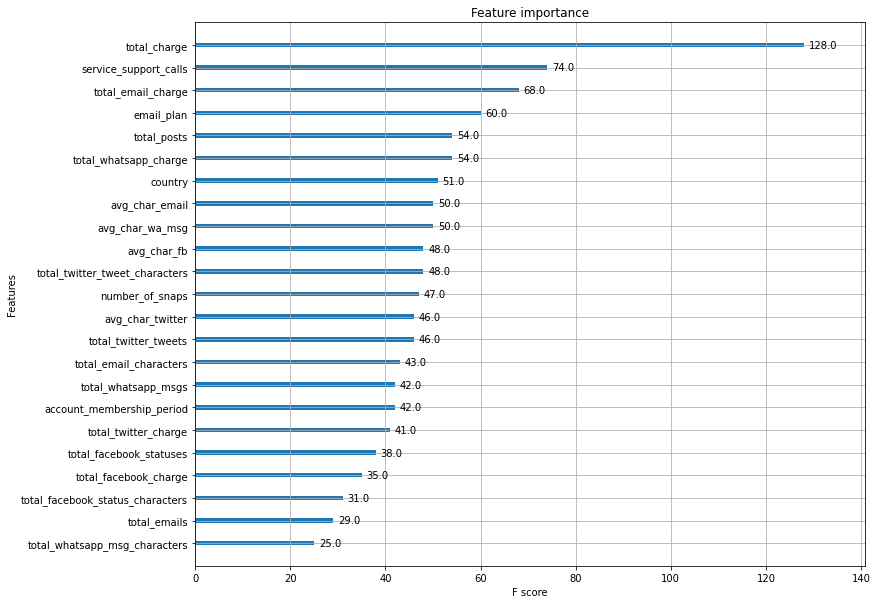

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(12, 10))
plot_importance(xgb,ax=ax)
plt.show()

In [47]:
sorted_idx = np.argsort(xgb.feature_importances_)[::-1]
for index in sorted_idx:
    print([X_train.columns[index], xgb.feature_importances_[index]]) 

['total_charge', 0.17821607]
['number_of_snaps', 0.15435627]
['total_emails', 0.09181566]
['service_support_calls', 0.0873717]
['total_email_charge', 0.07776502]
['email_plan', 0.07636404]
['avg_char_email', 0.038151216]
['total_twitter_tweet_characters', 0.028422987]
['total_twitter_tweets', 0.026191251]
['total_posts', 0.022668311]
['total_facebook_charge', 0.020627279]
['avg_char_fb', 0.018788578]
['total_whatsapp_msgs', 0.018706614]
['avg_char_twitter', 0.018488117]
['total_twitter_charge', 0.017986536]
['total_whatsapp_msg_characters', 0.017714916]
['total_facebook_status_characters', 0.017457709]
['country', 0.017000178]
['total_whatsapp_charge', 0.01687413]
['total_email_characters', 0.016671125]
['account_membership_period', 0.014887523]
['total_facebook_statuses', 0.013931945]
['avg_char_wa_msg', 0.009542865]
['snapchat_plan', 0.0]
['social_sites', 0.0]


In [48]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

In [49]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
train_preds=rf.predict(X_train)
preds=rf.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_train,train_preds)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1432
           1       1.00      0.99      1.00       242

    accuracy                           1.00      1674
   macro avg       1.00      1.00      1.00      1674
weighted avg       1.00      1.00      1.00      1674



In [53]:
print(classification_report(y_test, preds)) 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       478
           1       0.94      0.75      0.84        81

    accuracy                           0.96       559
   macro avg       0.95      0.87      0.91       559
weighted avg       0.96      0.96      0.96       559



In [54]:
import catboost as cb
from catboost import Pool

cb=cb.CatBoostClassifier()

In [55]:
cb.fit(X_train,y_train)

Learning rate set to 0.012837
0:	learn: 0.6826828	total: 60ms	remaining: 59.9s
1:	learn: 0.6695104	total: 68.3ms	remaining: 34.1s
2:	learn: 0.6559902	total: 72.7ms	remaining: 24.2s
3:	learn: 0.6419515	total: 77ms	remaining: 19.2s
4:	learn: 0.6299192	total: 79.9ms	remaining: 15.9s
5:	learn: 0.6193861	total: 83.1ms	remaining: 13.8s
6:	learn: 0.6095129	total: 85.3ms	remaining: 12.1s
7:	learn: 0.5980016	total: 88.3ms	remaining: 10.9s
8:	learn: 0.5839891	total: 91.4ms	remaining: 10.1s
9:	learn: 0.5712250	total: 93.9ms	remaining: 9.29s
10:	learn: 0.5596695	total: 96ms	remaining: 8.63s
11:	learn: 0.5460096	total: 98ms	remaining: 8.07s
12:	learn: 0.5361551	total: 100ms	remaining: 7.59s
13:	learn: 0.5250563	total: 103ms	remaining: 7.23s
14:	learn: 0.5148458	total: 106ms	remaining: 6.97s
15:	learn: 0.5061180	total: 109ms	remaining: 6.69s
16:	learn: 0.4976373	total: 111ms	remaining: 6.42s
17:	learn: 0.4851621	total: 113ms	remaining: 6.17s
18:	learn: 0.4732888	total: 115ms	remaining: 5.94s
19:	lea

182:	learn: 0.1321764	total: 486ms	remaining: 2.17s
183:	learn: 0.1318502	total: 488ms	remaining: 2.16s
184:	learn: 0.1315344	total: 490ms	remaining: 2.16s
185:	learn: 0.1312554	total: 494ms	remaining: 2.16s
186:	learn: 0.1308946	total: 496ms	remaining: 2.15s
187:	learn: 0.1306315	total: 498ms	remaining: 2.15s
188:	learn: 0.1303823	total: 500ms	remaining: 2.14s
189:	learn: 0.1300585	total: 502ms	remaining: 2.14s
190:	learn: 0.1299191	total: 503ms	remaining: 2.13s
191:	learn: 0.1295466	total: 505ms	remaining: 2.13s
192:	learn: 0.1292869	total: 507ms	remaining: 2.12s
193:	learn: 0.1289402	total: 509ms	remaining: 2.12s
194:	learn: 0.1287331	total: 511ms	remaining: 2.11s
195:	learn: 0.1283960	total: 513ms	remaining: 2.1s
196:	learn: 0.1281503	total: 515ms	remaining: 2.1s
197:	learn: 0.1279024	total: 517ms	remaining: 2.09s
198:	learn: 0.1275888	total: 519ms	remaining: 2.09s
199:	learn: 0.1271451	total: 521ms	remaining: 2.08s
200:	learn: 0.1267377	total: 522ms	remaining: 2.08s
201:	learn: 0.

364:	learn: 0.1001574	total: 837ms	remaining: 1.46s
365:	learn: 0.1000120	total: 839ms	remaining: 1.45s
366:	learn: 0.0999528	total: 842ms	remaining: 1.45s
367:	learn: 0.0997666	total: 844ms	remaining: 1.45s
368:	learn: 0.0995615	total: 846ms	remaining: 1.45s
369:	learn: 0.0994831	total: 848ms	remaining: 1.44s
370:	learn: 0.0992961	total: 850ms	remaining: 1.44s
371:	learn: 0.0991169	total: 852ms	remaining: 1.44s
372:	learn: 0.0989530	total: 854ms	remaining: 1.44s
373:	learn: 0.0988235	total: 856ms	remaining: 1.43s
374:	learn: 0.0986866	total: 858ms	remaining: 1.43s
375:	learn: 0.0985479	total: 860ms	remaining: 1.43s
376:	learn: 0.0982757	total: 862ms	remaining: 1.42s
377:	learn: 0.0980929	total: 864ms	remaining: 1.42s
378:	learn: 0.0980140	total: 866ms	remaining: 1.42s
379:	learn: 0.0978696	total: 868ms	remaining: 1.42s
380:	learn: 0.0977936	total: 870ms	remaining: 1.41s
381:	learn: 0.0977041	total: 873ms	remaining: 1.41s
382:	learn: 0.0976263	total: 875ms	remaining: 1.41s
383:	learn: 

530:	learn: 0.0824388	total: 1.19s	remaining: 1.05s
531:	learn: 0.0822962	total: 1.19s	remaining: 1.05s
532:	learn: 0.0822846	total: 1.19s	remaining: 1.05s
533:	learn: 0.0822525	total: 1.2s	remaining: 1.04s
534:	learn: 0.0822005	total: 1.2s	remaining: 1.04s
535:	learn: 0.0820515	total: 1.2s	remaining: 1.04s
536:	learn: 0.0819594	total: 1.2s	remaining: 1.04s
537:	learn: 0.0818204	total: 1.21s	remaining: 1.04s
538:	learn: 0.0817361	total: 1.21s	remaining: 1.03s
539:	learn: 0.0816662	total: 1.21s	remaining: 1.03s
540:	learn: 0.0816100	total: 1.21s	remaining: 1.03s
541:	learn: 0.0814578	total: 1.21s	remaining: 1.03s
542:	learn: 0.0813365	total: 1.22s	remaining: 1.02s
543:	learn: 0.0812165	total: 1.22s	remaining: 1.02s
544:	learn: 0.0810856	total: 1.22s	remaining: 1.02s
545:	learn: 0.0810333	total: 1.22s	remaining: 1.02s
546:	learn: 0.0809737	total: 1.23s	remaining: 1.01s
547:	learn: 0.0809284	total: 1.23s	remaining: 1.01s
548:	learn: 0.0807556	total: 1.23s	remaining: 1.01s
549:	learn: 0.08

692:	learn: 0.0693992	total: 1.58s	remaining: 700ms
693:	learn: 0.0692845	total: 1.58s	remaining: 698ms
694:	learn: 0.0692470	total: 1.58s	remaining: 696ms
695:	learn: 0.0691590	total: 1.59s	remaining: 694ms
696:	learn: 0.0690788	total: 1.59s	remaining: 691ms
697:	learn: 0.0690498	total: 1.59s	remaining: 689ms
698:	learn: 0.0690377	total: 1.59s	remaining: 686ms
699:	learn: 0.0689176	total: 1.6s	remaining: 684ms
700:	learn: 0.0688582	total: 1.6s	remaining: 682ms
701:	learn: 0.0687173	total: 1.6s	remaining: 680ms
702:	learn: 0.0686746	total: 1.6s	remaining: 677ms
703:	learn: 0.0685572	total: 1.61s	remaining: 676ms
704:	learn: 0.0683747	total: 1.61s	remaining: 674ms
705:	learn: 0.0683570	total: 1.61s	remaining: 672ms
706:	learn: 0.0682991	total: 1.61s	remaining: 669ms
707:	learn: 0.0682654	total: 1.62s	remaining: 667ms
708:	learn: 0.0681665	total: 1.62s	remaining: 665ms
709:	learn: 0.0680448	total: 1.62s	remaining: 662ms
710:	learn: 0.0679323	total: 1.62s	remaining: 660ms
711:	learn: 0.06

867:	learn: 0.0563828	total: 1.93s	remaining: 294ms
868:	learn: 0.0563609	total: 1.93s	remaining: 291ms
869:	learn: 0.0562731	total: 1.93s	remaining: 289ms
870:	learn: 0.0561957	total: 1.94s	remaining: 287ms
871:	learn: 0.0561732	total: 1.94s	remaining: 285ms
872:	learn: 0.0560557	total: 1.94s	remaining: 282ms
873:	learn: 0.0560164	total: 1.94s	remaining: 280ms
874:	learn: 0.0559924	total: 1.94s	remaining: 278ms
875:	learn: 0.0559379	total: 1.95s	remaining: 275ms
876:	learn: 0.0558044	total: 1.95s	remaining: 273ms
877:	learn: 0.0557286	total: 1.95s	remaining: 271ms
878:	learn: 0.0557031	total: 1.95s	remaining: 269ms
879:	learn: 0.0556454	total: 1.95s	remaining: 266ms
880:	learn: 0.0556295	total: 1.96s	remaining: 264ms
881:	learn: 0.0555935	total: 1.96s	remaining: 262ms
882:	learn: 0.0554749	total: 1.96s	remaining: 260ms
883:	learn: 0.0554186	total: 1.96s	remaining: 258ms
884:	learn: 0.0553328	total: 1.97s	remaining: 255ms
885:	learn: 0.0552708	total: 1.97s	remaining: 253ms
886:	learn: 

In [56]:
train_preds=cb.predict(X_train)
preds=cb.predict(X_test)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_train,train_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1432
           1       1.00      0.89      0.94       242

    accuracy                           0.98      1674
   macro avg       0.99      0.95      0.97      1674
weighted avg       0.98      0.98      0.98      1674



In [59]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       478
           1       0.93      0.84      0.88        81

    accuracy                           0.97       559
   macro avg       0.95      0.91      0.93       559
weighted avg       0.97      0.97      0.97       559



In [60]:
feature_importances = cb.get_feature_importance(Pool(X_train,y_train))
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

total_charge: 26.19094939792399
service_support_calls: 13.697593798980776
email_plan: 10.384099321795118
total_email_charge: 5.05191464353103
total_emails: 4.160325882435443
number_of_snaps: 3.7370177952871986
snapchat_plan: 3.1753173223357147
social_sites: 2.7544681639672195
country: 2.594039195819138
total_facebook_charge: 2.585664421479339
avg_char_email: 2.528667780080443
total_twitter_tweets: 2.234984059475698
total_twitter_tweet_characters: 2.0871423966928746
total_whatsapp_msgs: 2.0597871293451577
total_email_characters: 1.9151232758591774
avg_char_twitter: 1.8085483844854626
avg_char_wa_msg: 1.6644655878219026
total_facebook_status_characters: 1.6535684201105791
total_posts: 1.6271239969881284
account_membership_period: 1.5191510849820298
total_twitter_charge: 1.4320467962497432
total_whatsapp_charge: 1.3691988698841702
avg_char_fb: 1.3275036494849661
total_whatsapp_msg_characters: 1.2296262003509812
total_facebook_statuses: 1.211672424633731


In [61]:
feature_names

Index(['total_facebook_statuses', 'account_membership_period',
       'service_support_calls', 'number_of_snaps', 'total_whatsapp_charge',
       'total_twitter_tweets', 'country', 'total_email_characters',
       'email_plan', 'total_whatsapp_msg_characters', 'total_whatsapp_msgs',
       'total_facebook_charge', 'total_twitter_charge', 'snapchat_plan',
       'total_email_charge', 'total_twitter_tweet_characters', 'total_emails',
       'total_facebook_status_characters', 'avg_char_wa_msg',
       'avg_char_twitter', 'avg_char_fb', 'avg_char_email', 'total_charge',
       'total_posts', 'social_sites'],
      dtype='object')

In [62]:
train.columns

Index(['total_facebook_statuses', 'account_membership_period',
       'service_support_calls', 'number_of_snaps', 'total_whatsapp_charge',
       'total_twitter_tweets', 'country', 'total_email_characters',
       'email_plan', 'total_whatsapp_msg_characters', 'total_whatsapp_msgs',
       'total_facebook_charge', 'total_twitter_charge', 'snapchat_plan',
       'total_email_charge', 'total_twitter_tweet_characters', 'total_emails',
       'total_facebook_status_characters', 'turn_anti_social',
       'avg_char_wa_msg', 'avg_char_twitter', 'avg_char_fb', 'avg_char_email',
       'total_charge', 'total_posts', 'social_sites'],
      dtype='object')

In [63]:
final_preds=xgb.predict(test)

In [64]:
final_preds2=rf.predict(test)

In [65]:
final_preds3=cb.predict(test)

In [66]:
test_bp.head(1)

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country,total_email_characters,...,social_account_number,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,snapchat_plan,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
0,0,130,100,2,0,2.86,415,69,CT,7.3,...,389-2114,122,40.09,14.96,no,1.97,176.0,1,235.8,0


In [67]:
submiss = test_bp[['uid']]

In [68]:
submiss['turn_anti_social']=final_preds
submiss.to_csv('xgb_sub.csv',index=False) 

In [69]:
submiss['turn_anti_social']=final_preds3
submiss.to_csv('cb_sub.csv',index=False) 

#### Some more experiments that can be tried are:

#### i) Logarithmic transformation of the numerical columns
#### ii) Dimensional Reductional Techniques like PCA
#### iii) Recursive Feature Elimination for selecting best features
#### iv) Stacking